## Import Library

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as пр

from numpy import array
from sklearn.model_selection import train_test_split #sklearn digunakan untuk split data

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Dataset

In [12]:
data = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv', index_col=0) #Load dataset menggunakan Library Pandas
data = data[['Text Tweet', 'Sentiment']]
data.head()

,Text Tweet,Sentiment
Id,,
1,Banyak akun kloning seolah2 pendukung #agussil...,negative
2,#agussilvy bicara apa kasihan yaa...lap itu ai...,negative
3,Kalau aku sih gak nunggu hasil akhir QC tp lag...,negative
4,Kasian oh kasian dengan peluru 1milyar untuk t...,negative
5,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,negative


## Preprocess: Convert Label

In [13]:
#Mengubah sentimen menjadi menjadi 0 dan 1
#x menghimpun dataset
#y menghimpun sentimen
y = [ 0 if i=='negative' else 1 for i in data['Sentiment'] ] #0 untuk sentimen negatif dan 1 untuk sentimen positif
x = data['Text Tweet']
print(x[:5], y[:5])

Id
1    Banyak akun kloning seolah2 pendukung #agussil...
2    #agussilvy bicara apa kasihan yaa...lap itu ai...
3    Kalau aku sih gak nunggu hasil akhir QC tp lag...
4    Kasian oh kasian dengan peluru 1milyar untuk t...
5    Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...
Name: Text Tweet, dtype: object [0, 0, 0, 0, 0]


## Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30) #Split 30% untuk data testing dan 70% untuk data training

In [15]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
#Terdapat 142 data yang sentimennya negatif dan 128 data yang sentimennya positif

[[  0 142]
 [  1 128]]


## Model Configuration

In [16]:
vocab_size = 10000 #Digunakan untuk Tokenizer 
embedding_dim = 16 #Digunakan untuk Konfigurasi Model
max_length = 100 #Digunakan untuk Word Embedding
trunc_type='post' #Digunakan untuk representasi urutan numerik data teks (dari kiri)
padding_type='post' #Digunakan untuk menentukan panjang maksimum untuk kalimat
oov_tok = "<00V>" #Digunakan untuk token kosa kata yang ditemukan selama tokenisasi dan penyandian urutan data uji

In [17]:
#Preprocess: Tokenization
#Pada saat praproses dilakukan Tokenisasi adalah proses untuk membagi teks yang dapat berupa kalimat, paragraf atau dokumen, menjadi token-token/bagian-bagian tertentu.
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x)

word_index = tokenizer.word_index #Kumpulkan word index

training_sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

#Padding
#Padding adalah operasi untuk menambah ukuran data input
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Convert to Numpy Array
#Convert hasil padding ke Array
training_padded = пр.array(training_padded)
training_labels = np.array(y_train)

testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

## Model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #Digunakan untuk membuat word embedding(Merepresentasikan vektor np.array kedalam bentuk embedding agar lebih representatif)
    tf.keras.layers.GlobalAveragePooling1D(), #Pooling 1 Dimensi dikarenakan bentuknya array
    tf.keras.layers.Dense(24, activation='sigmoid'), #Multi Perceptron 1 layer berisi 24 layer dengan fungsi aktivasi sigmoid
    tf.keras.layers.Dropout(0.5), #Tambahkan Dropout untuk menghandle Overfit
    tf.keras.layers.Dense(1, activation='sigmoid') #1 layer untuk output layer single perceptron dengan fungsi aktivasi sigmoid(menentukan class 0 atau 1)
])
model.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy']) #Model binary_crossentropy untuk 0 dan 1

## Training

In [19]:
num_epochs = 90
history = model.fit(training_padded, training_labels, batch_size = 10, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2) #batch_size digunakan untuk mempercepat proses epoch dikarenakan jumlah data training dibagi dengan batch_sizenya

Epoch 1/90
63/63 - 5s - loss: 0.7445 - accuracy: 0.4937 - val_loss: 0.6918 - val_accuracy: 0.5259 - 5s/epoch - 74ms/step
Epoch 2/90
63/63 - 0s - loss: 0.7329 - accuracy: 0.4921 - val_loss: 0.6932 - val_accuracy: 0.4741 - 262ms/epoch - 4ms/step
Epoch 3/90
63/63 - 0s - loss: 0.7415 - accuracy: 0.4857 - val_loss: 0.6956 - val_accuracy: 0.4741 - 239ms/epoch - 4ms/step
Epoch 4/90
63/63 - 0s - loss: 0.7338 - accuracy: 0.4905 - val_loss: 0.6937 - val_accuracy: 0.4741 - 267ms/epoch - 4ms/step
Epoch 5/90
63/63 - 0s - loss: 0.7266 - accuracy: 0.5048 - val_loss: 0.6936 - val_accuracy: 0.4741 - 257ms/epoch - 4ms/step
Epoch 6/90
63/63 - 0s - loss: 0.7292 - accuracy: 0.4984 - val_loss: 0.6934 - val_accuracy: 0.4741 - 242ms/epoch - 4ms/step
Epoch 7/90
63/63 - 0s - loss: 0.7311 - accuracy: 0.4937 - val_loss: 0.6930 - val_accuracy: 0.4741 - 231ms/epoch - 4ms/step
Epoch 8/90
63/63 - 0s - loss: 0.7132 - accuracy: 0.5349 - val_loss: 0.6922 - val_accuracy: 0.4815 - 237ms/epoch - 4ms/step
Epoch 9/90
63/63 -

## Display History

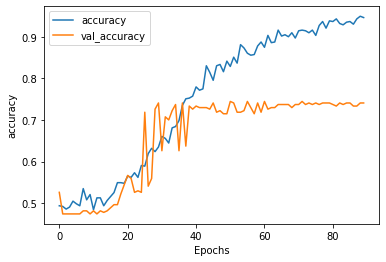

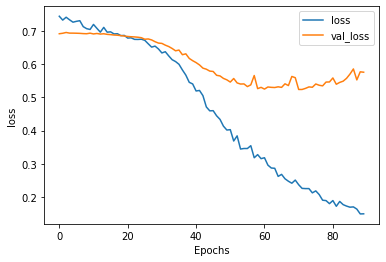

In [20]:
#Matplotlib digunakan untuk visualiasi data
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Grafik Pertama val_accuracy untuk data test dan accuracy untuk data train. Untuk val_accuracy mencapai angka 0.7259 sedangkan accuracy mencapai angka 0.9905

Grafik Kedua untuk val_accuracy cukup menurun dan untuk accuracy untuk dapat turun hingga maksimal. Model ini optimal untuk data train namun kurang optimal untuk data test

In [21]:
y_pred = пр.rint(model.predict(testing_padded)) #Masukkan data test pada model
y_pred

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

Didapatkan output list kumpulan class untuk setiap data test

## Confusion Matrix

In [22]:
con_mat = tf.math.confusion_matrix(labels=testing_labels, predictions=y_pred).numpy() #Membuat confusion matrix menggunakan Tensorflow
con_mat

array([[ 98,  44],
       [ 26, 102]], dtype=int32)

Terdapat 98 class 0 dan 102 untuk class 1

## Confusion Matrix Normalized

In [23]:
classes=[0,1]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
con_mat_df

,0,1
0,0.69,0.31
1,0.20,0.80


Setelah di Normalisasi didapat  class 0 dengan akurasi 69 % dan class 1 dengan akurasi 80 %

## Display Confusion Matrix

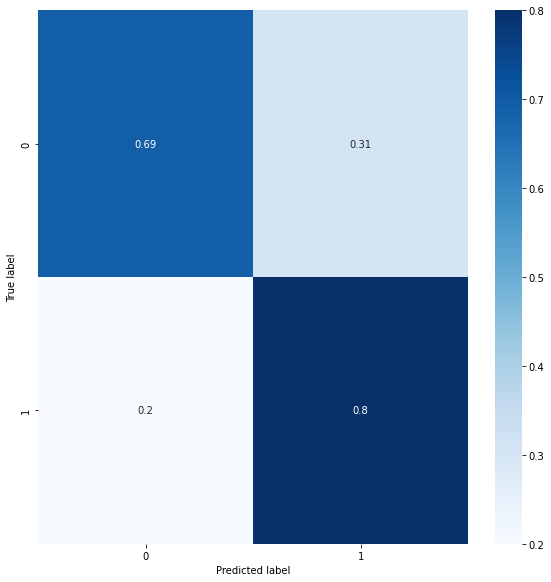

In [24]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Test Sentence

Analisis prediksi sentimen positif

In [25]:
sentence = ["Anies menang Pilkada"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

[[1.]]


Analisis prediksi sentimen negatif

In [26]:
sentence = ["Ahok kalah Pilkada"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

[[0.]]
